
# Modelo de Mínimos Cuadrados para Clasificación


Sea un data set $\bf{X}\in \mathbb{R}^{N\times D}$

Y una matriz de etiquetas con notación 1 de K: $\bf{T}\in \mathbb{Z}^{N\times K}$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import scipy.io as sc
import pickle
import pandas as pd


## 1. Reconocimiento de emosiones

### Modelo PCA

In [12]:
from sklearn.decomposition import PCA
dataset = pd.read_pickle('./S17MIX.pkl')

Etiquetas = dataset['EMOCIÓN']
Etiquetas = np.array(Etiquetas.values)

X =  dataset.drop(['EMOCIÓN'],axis=1)
X = X.values
from sklearn.preprocessing import scale
X = scale(X)

(40,) 
 Explained variance 1.0


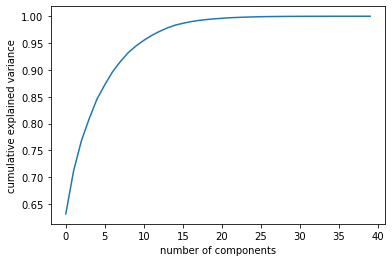

In [13]:
#pca = PCA(n_components=2) # se paso a una matiz con igula dimencion de la original.
#pca.fit(X) # ejecuta el modelo PCA y retorna las 'k' principales componentes

pca = PCA().fit(X) 
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:50]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Observaciones
* El numero de dimensiones neserarias para lograr una varianza acumulada de los datos de aprox 95% es de 10. 

In [14]:
pca = PCA(10,svd_solver='randomized') # Version rapida para calculo de la matriz de covarianza (SVD), para grandes dimensiones.
pca.fit(X)

PCA(n_components=10, svd_solver='randomized')

(40, 65)
(40, 10)
[42.12118887  5.34854601  3.73392719  2.74481339  2.43646289  1.78220404
  1.6106972   1.26896095  1.0956383   0.83511588]


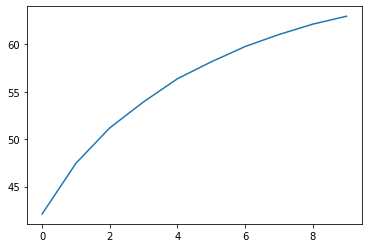

In [15]:
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)
print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_))

## Observacion
* Se observan las dimensiones que aportan mas varianza del modelo.

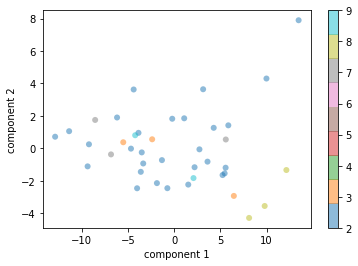

In [16]:

for i in range(40):
  if(Etiquetas[i]=="negativa"):
    Etiquetas[i]=1
  if(Etiquetas[i]=="neutral"):
    Etiquetas[i]=2
  if(Etiquetas[i]=="positiva"):
    Etiquetas[i]=3
  if(Etiquetas[i]=="Stress"):
    Etiquetas[i]=4
  if(Etiquetas[i]=="calm"):
    Etiquetas[i]=5
  if(Etiquetas[i]=="tristeza"):
    Etiquetas[i]=6
  if(Etiquetas[i]=="satisfecho"):
    Etiquetas[i]=7
  if(Etiquetas[i]=="tranquilid"):
    Etiquetas[i]=8
  if(Etiquetas[i]=="sorpresa"):
    Etiquetas[i]=9


plt.scatter(projected[:, 0], projected[:, 1], # grafica todos los puntos de la coordenada x ([:, 0]) y los puntos de la coordenada y
            c=Etiquetas, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 9)) # color map de 10 por q se que hay 10 clases
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

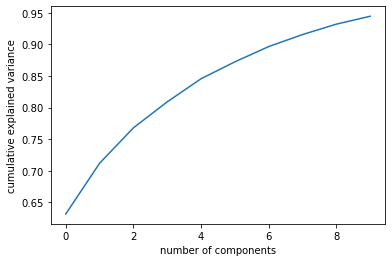

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:

import seaborn as sns
# Creamos el dataframe para seaborn
datapca = pd.DataFrame(projected)
labels  = dataset['EMOCIÓN']
datapca['EMOCIÓN'] = labels.values

# para compiar los nombre de las columnas a un nuevo dataframe
# newDataFrame.colums = datos.columns.vules

#g = sns.PairGrid(dataXpca, hue='EMOCIÓN')
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()


In [19]:
print(projected.shape)
Recovery = pca.inverse_transform(projected)
print(Recovery.shape)

print(X.shape)

(40, 10)
(40, 65)
(40, 65)


In [20]:
datapca

,0,1,2,3,4,5,6,7,8,9,EMOCIÓN
0,-4.392800,3.625357,-1.016443,1.075723,0.288118,-2.308667,-1.179596,-1.736147,0.619778,2.221937,neutral
1,6.453294,-2.939869,0.541423,0.172289,2.109143,0.577883,-0.604488,1.703185,1.396049,0.305394,positiva
2,-0.216183,1.820048,6.441814,6.457690,-3.526887,1.517632,-0.873731,-0.513392,1.026053,0.255940,neutral
3,-12.895040,0.711721,-0.170583,-0.537250,0.437915,0.368322,0.228447,-1.487544,-0.499957,-1.020241,neutral
4,-5.520570,0.370048,-0.622456,-0.471165,-1.676951,-1.387753,0.234359,-0.681704,-0.298678,0.376699,positiva
5,1.078993,1.847484,-0.590212,0.259395,0.393993,-1.823737,-1.325331,1.381268,0.763311,-1.709896,neutral
6,-8.562161,1.746338,0.467672,-1.016486,1.196147,0.390120,0.526394,0.499223,1.263127,-0.265290,satisfecho
7,2.201383,-1.170715,-1.469079,0.363689,0.833779,1.079602,1.695904,0.390668,0.589162,1.478030,neutral
8,-3.870948,0.950872,0.764907,0.965695,1.244770,0.258794,0.672654,1.351293,-1.536912,0.440713,neutral
9,2.085096,-1.839694,-0.535009,1.417208,2.060502,0.399289,-1.037545,1.026882,0.564717,-0.028484,sorpresa


### Modelos lineales de clasificacion Bayesiano y Regresion Logıstica

In [142]:
#db = pickle.load('featS17.pkl')
#db = open('featS17.pkl','wb')

'''
filename = 'S17MIX.pkl'
#X = db['data']
#t = db['target']

infile = open(filename,'rb')
#new_dict = pickle.load(infile)
dataset = pd.DataFrame(pickle.load(infile))
infile.close()
'''

#dataset = pd.read_pickle('./S17MIX.pkl')


#dataset

In [23]:

Etiquetas = dataset['EMOCIÓN']
'''
for i in range(40):
  if(Etiquetas[i]=="negativa"):
    Etiquetas[i]=1
  if(Etiquetas[i]=="neutral"):
    Etiquetas[i]=2
  if(Etiquetas[i]=="positiva"):
    Etiquetas[i]=3
  if(Etiquetas[i]=="Stress"):
    Etiquetas[i]=4
  if(Etiquetas[i]=="calm"):
    Etiquetas[i]=5
  if(Etiquetas[i]=="tristeza"):
    Etiquetas[i]=6
  if(Etiquetas[i]=="satisfecho"):
    Etiquetas[i]=7
  if(Etiquetas[i]=="tranquilid"):
    Etiquetas[i]=8
  if(Etiquetas[i]=="sorpresa"):
    Etiquetas[i]=9
'''    
Etiquetas = np.array(Etiquetas.values)

#Etiquetas.astype
#Etiquetas



In [146]:
#X =  dataset.drop(['EMOCIÓN'],axis=1)
#X = X.values
#X.shape

(40, 65)

In [24]:
#from sklearn.preprocessing import scale
#X = scale(X)

# construimos el clasificador Bayesiano
from sklearn.naive_bayes import GaussianNB

# Se crea el modelo (ej. clasificador)
model = GaussianNB() # Verificar cuales son los parametros que tiene este clasificador.
# Se entrena el modelo
model.fit(X,Etiquetas)
# Se realiza una predicción de las etiquetas
yEst = model.predict(X)


In [26]:
print('Etq estimadas: \n', yEst)
print('Etq reales: \n', Etiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(Etiquetas,yEst))
print('Confunsion Matrix: \n', confusion_matrix(Etiquetas,yEst))

Etq estimadas: 
 ['neutral' 'positiva' 'neutral' 'neutral' 'positiva' 'neutral'
 'satisfecho' 'neutral' 'neutral' 'sorpresa' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'tranquilid' 'neutral' 'satisfecho'
 'satisfecho' 'positiva' 'neutral' 'tranquilid' 'neutral' 'neutral'
 'tranquilid' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'sorpresa' 'neutral' 'positiva'
 'satisfecho']
Etq reales: 
 ['neutral' 'positiva' 'neutral' 'neutral' 'positiva' 'neutral'
 'satisfecho' 'neutral' 'neutral' 'sorpresa' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'tranquilid' 'neutral' 'satisfecho'
 'satisfecho' 'neutral' 'neutral' 'tranquilid' 'neutral' 'neutral'
 'tranquilid' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'sorpresa' 'neutral' 'positiva'
 'neutral']
Accuracy:  0.95
Confunsion Matrix: 
 [[27  1  1  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  

In [ ]:
#from sklearn.preprocessing import scale
#X = scale(X)

from  sklearn.linear_model import LogisticRegression
# Se crea el modelo (ej. clasificador)
modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(X,Etiquetas)
# Se realiza una predicción
yEst = modelRL.predict(X)

# Evaluación del rendimiento
print('Etq estimadas: ', yEst)
print('Etq reales: ', Etiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(Etiquetas,yEst))
print('Confunsion Matrix: \n', confusion_matrix(Etiquetas,yEst))

### Ahora se procede a realizar el entrenamiento con los datos generados al usar el modelo PCA para comparar si al pasar a un espacio latente de menor dimensionalidad que el problema original se pierde o se disminuye la certeza en los modelos de clasificación probabilísticos.

In [29]:
# construimos el clasificador Bayesiano
from sklearn.naive_bayes import GaussianNB

# Se crea el modelo (ej. clasificador)
model = GaussianNB() # Verificar cuales son los parametros que tiene este clasificador.
# Se entrena el modelo
model.fit(projected,Etiquetas)
# Se realiza una predicción de las etiquetas
yEst = model.predict(projected)

##############################################################################################################################

print('Etq estimadas: \n', yEst)
print('Etq reales: \n', Etiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(Etiquetas,yEst))
print('Confunsion Matrix: \n', confusion_matrix(Etiquetas,yEst))

Etq estimadas: 
 ['neutral' 'positiva' 'neutral' 'neutral' 'positiva' 'neutral'
 'satisfecho' 'neutral' 'neutral' 'sorpresa' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'tranquilid' 'neutral' 'satisfecho'
 'satisfecho' 'neutral' 'neutral' 'tranquilid' 'neutral' 'neutral'
 'tranquilid' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'sorpresa' 'neutral' 'positiva'
 'neutral']
Etq reales: 
 ['neutral' 'positiva' 'neutral' 'neutral' 'positiva' 'neutral'
 'satisfecho' 'neutral' 'neutral' 'sorpresa' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'tranquilid' 'neutral' 'satisfecho'
 'satisfecho' 'neutral' 'neutral' 'tranquilid' 'neutral' 'neutral'
 'tranquilid' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'sorpresa' 'neutral' 'positiva'
 'neutral']
Accuracy:  1.0
Confunsion Matrix: 
 [[29  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  2  0]

In [30]:
from  sklearn.linear_model import LogisticRegression
# Se crea el modelo (ej. clasificador)
modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(projected,Etiquetas)
# Se realiza una predicción
yEst = modelRL.predict(projected)

# Evaluación del rendimiento
print('Etq estimadas: ', yEst)
print('Etq reales: ', Etiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(Etiquetas,yEst))
print('Confunsion Matrix: \n', confusion_matrix(Etiquetas,yEst))

Etq estimadas:  ['neutral' 'positiva' 'neutral' 'neutral' 'neutral' 'neutral' 'satisfecho'
 'neutral' 'neutral' 'sorpresa' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'tranquilid' 'neutral' 'satisfecho' 'neutral'
 'neutral' 'neutral' 'tranquilid' 'neutral' 'neutral' 'tranquilid'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'positiva' 'neutral']
Etq reales:  ['neutral' 'positiva' 'neutral' 'neutral' 'positiva' 'neutral'
 'satisfecho' 'neutral' 'neutral' 'sorpresa' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'tranquilid' 'neutral' 'satisfecho'
 'satisfecho' 'neutral' 'neutral' 'tranquilid' 'neutral' 'neutral'
 'tranquilid' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'sorpresa' 'neutral' 'positiva'
 'neutral']
Accuracy:  0.925
Confunsion Matrix: 
 [[29  0  0  0  0]
 [ 1  2  0  0  0]
 [ 1  0  2  0  0]
 [ 1  0  0  1  0]
 [ 0 

C:\Users\jazd1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. Base de datos de rostros

In [63]:
from sklearn.datasets import fetch_lfw_people # base de datos muy interesante con 5749 clases, 13233 observaciones, dimensionalidad de 5828
faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
Etiquetas = faces.target
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


(1348,) 
 Explained variance 0.94607234


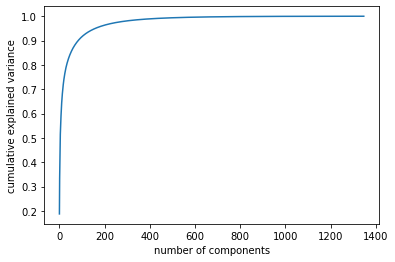

In [64]:
pca = PCA().fit(X) 
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:150]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [65]:
pca = PCA(150,svd_solver='randomized') # Version rapida para calculo de la matriz de covarianza (SVD), para grandes dimensiones.
pca.fit(X)

PCA(n_components=150, svd_solver='randomized')

(1348, 2914)
(1348, 150)
[784936.75   608064.44   296716.44   251954.62   210630.3    122705.67
 103192.47    85577.81    82269.445   79043.85    65244.934   61428.77
  50753.52    45792.195   43579.875   40619.867   37896.887   36650.473
  33977.85    29450.715   28537.117   27075.26    25220.291   24171.18
  22243.428   21759.592   20896.223   19911.121   18907.506   17769.574
  16931.99    15883.302   15038.833   14662.893   14535.636   13576.839
  13142.034   12975.393   12858.273   12115.949   11810.455   11481.828
  11400.761   10864.264   10303.251    9954.48     9822.588    9675.314
   9497.661    9270.457    8799.688    8600.328    8483.274    8385.228
   8180.6304   8167.1753   7860.561    7637.796    7384.061    7349.0923
   7310.245    6950.592    6741.029    6626.5093   6543.3564   6389.185
   6267.9077   6106.3477   6070.586    5894.188    5872.3657   5700.803
   5688.606    5500.4824   5402.303    5247.371    5221.278    5144.1255
   5042.885    4963.3667   4906.4805   4

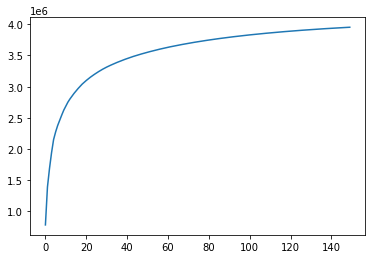

In [66]:
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)
print(pca.explained_variance_)
plt.plot(np.cumsum(pca.explained_variance_))

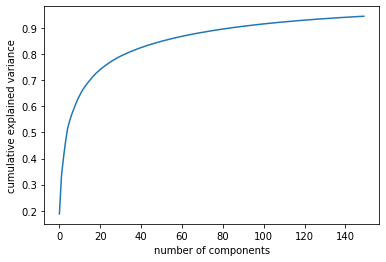

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

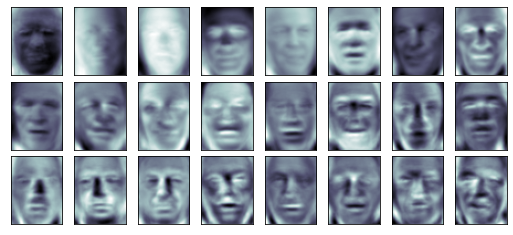

In [68]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

In [69]:
components = pca.transform(X)
projected = pca.inverse_transform(components)

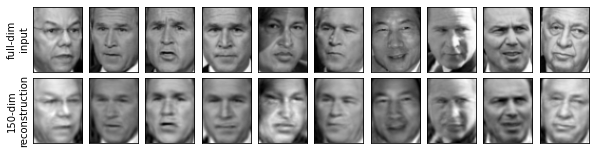

In [70]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

In [71]:
print(X.shape)
print(Etiquetas.shape)

(1348, 2914)
(1348,)


In [72]:
from sklearn.naive_bayes import GaussianNB

# Se crea el modelo (ej. clasificador)
model = GaussianNB() # Verificar cuales son los parametros que tiene este clasificador.
# Se entrena el modelo
model.fit(X,Etiquetas)
# Se realiza una predicción de las etiquetas
yEst = model.predict(X)

##############################################################################################################################

print('Etq estimadas: \n', yEst)
print('Etq reales: \n', Etiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(Etiquetas,yEst))
print('Confunsion Matrix: \n', confusion_matrix(Etiquetas,yEst))

Etq estimadas: 
 [1 1 3 ... 4 6 5]
Etq reales: 
 [1 3 3 ... 7 3 5]
Accuracy:  0.5259643916913946
Confunsion Matrix: 
 [[ 46   6  10   5   1   4   1   4]
 [ 24 131   8  17   5  18  22  11]
 [ 10  12  71   4  10   5   6   3]
 [ 13  47  30 248  19  79  52  42]
 [  1   4   8   3  44  27   5  17]
 [  2   2   0   4   6  43   7   7]
 [  1   0   0   1   1  11  46   0]
 [  5  16   4   1   8  15  15  80]]


In [74]:
from  sklearn.linear_model import LogisticRegression
# Se crea el modelo (ej. clasificador)
modelRL = LogisticRegression()
# Se entrena el modelo
modelRL.fit(X,Etiquetas)
# Se realiza una predicción
yEst = modelRL.predict(projected)

# Evaluación del rendimiento
print('Etq estimadas: ', yEst)
print('Etq reales: ', Etiquetas)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(Etiquetas,yEst))
print('Confunsion Matrix: \n', confusion_matrix(Etiquetas,yEst))

Etq estimadas:  [1 3 3 ... 7 3 5]
Etq reales:  [1 3 3 ... 7 3 5]
Accuracy:  0.9399109792284867
Confunsion Matrix: 
 [[ 73   2   0   1   1   0   0   0]
 [  0 223   0  11   0   0   0   2]
 [  2   3 102   9   1   0   0   4]
 [  2   8   5 513   2   0   0   0]
 [  0   1   1   5 100   0   0   2]
 [  0   0   0   0   1  70   0   0]
 [  0   1   0   0   2   1  56   0]
 [  0   2   0   8   4   0   0 130]]


C:\Users\jazd1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
